In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# create ticker objects for our two securities that we will compare
spy = yf.Ticker('SPY')
tsla = yf.Ticker('TSLA')

In [3]:
# pull pricing data for our equities using the yf method history
spy_h = spy.history(period='30d', interval='60m')
tsla_h = tsla.history(period='30d', interval='60m')

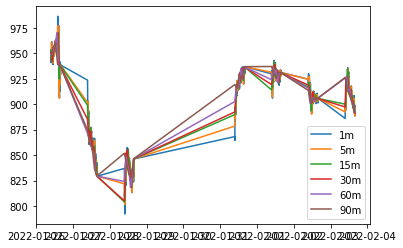

In [4]:
# chart the moving average
ema9intervals = ['1m', '5m', '15m', '30m', '60m', '90m']
charts = {}

for interval in ema9intervals:
    charts[interval] = tsla.history(period='7d', interval=interval)
    plt.plot(charts[interval].index, charts[interval]['Close'], label=interval)

plt.legend()
plt.show()

# chart isn't plotting the data continuously... there are non-trading days being charted
# need to fix that

In [38]:
spy_index = spy_h.reset_index()
spy_index[['Datetime']]

,Datetime
0,2021-12-22 09:30:00-05:00
1,2021-12-22 10:30:00-05:00
2,2021-12-22 11:30:00-05:00
3,2021-12-22 12:30:00-05:00
4,2021-12-22 13:30:00-05:00
...,...
205,2022-02-03 11:30:00-05:00
206,2022-02-03 12:30:00-05:00
207,2022-02-03 13:30:00-05:00
208,2022-02-03 14:30:00-05:00


In [39]:
# split up training data and testing data from our historical data objects
X_train, X_test, y_train, y_test = train_test_split(spy_index[['Datetime']], spy_h['Close'], test_size=0.2, random_state=0)

In [40]:
# running some regressions
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

/Users/noboa/.local/share/virtualenvs/trading_scripts-2QlzeJCK/lib/python3.9/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
def viz_polynomial():
    plt.scatter(spy_h.index, spy_h['Close'], color='red')
    plt.plot(spy_h.index, pol_reg.predict(poly_reg.fit_transform(spy_h['Close']])), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return

viz_polynomial()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(list(spy_h.index, spy_h[['Close']]))